<a href="https://colab.research.google.com/github/frankyuan515/GoogleLab/blob/lab2_svm/Lab2.2-svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#EE15D'>**SVM**</font>

<font color='#EE15D'>**Questions:**</font>

1.   LinearSVC section: Create 2 models (model1, model2), compare the results after visulizations, Which one is a better classifier for this dataset?
2.   SVC section: Create one model (model3), with SVC and compare it with 2 previous models after visulizations .
1.   Use model3.support_ and model3.n_support_ to determine the number of support vectors in each class in model 3. Visualize the support vectors. How many support vectors are there in Class 1 and Class 2 (separately)?
2.   NuSVC section, Create one model (model4) with NuSVC, and compare it with 3 previous models after visulizations.
1.   Visualize model 4 and compare the number of support vector machines with model 3.
2.   Kernel Trick section: Create 3 models (model5, model6, and model7), Visualize the results of the 3 models and interpret them. Which model best fits the data?

<font color='#EE15D'>Note:</font> Proceed through the code, answering the questions one by one in separate cells, each inserted after its corresponding question.






## **🔸 Imports**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<font color='#EE15D'>Note:</font>  Before starting, if you are not familiar with scikit-learn or how to import, please study this link.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html



## **🔸 SVM (sklearn)**

In [6]:
from sklearn.svm import LinearSVC, SVC, NuSVC

<font color='#EE15D'>We have created a dataset with 1000 samples and 2 classes

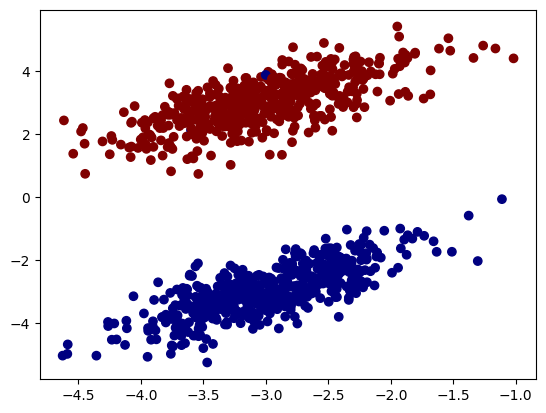

In [7]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, class_sep=3., random_state=12)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

### `LinearSVC`

<font color='#GG15D'>**Question1:**</font> <font color='#EE15D'>Create 2 models based on the following hyperparameters and compare the results after visulizations:



*   **model1**: LinearSVC, loss= hinge, C=1.2, max_iter=2000
*   **model2**: LinearSVC, loss= squared_hinge, C=2.5, max_iter=1000

<font color='#EE15D'>Which one is a better classifier for this dataset?





In [8]:
model1 = LinearSVC(loss='hinge', C=1.2, max_iter=2000)
model1.fit(X, y)

LinearSVC(C=1.2, loss='hinge', max_iter=2000)

In [9]:
model2 = LinearSVC(loss='squared_hinge', C=2.5, max_iter=1000)
model2.fit(X, y)

LinearSVC(C=2.5)

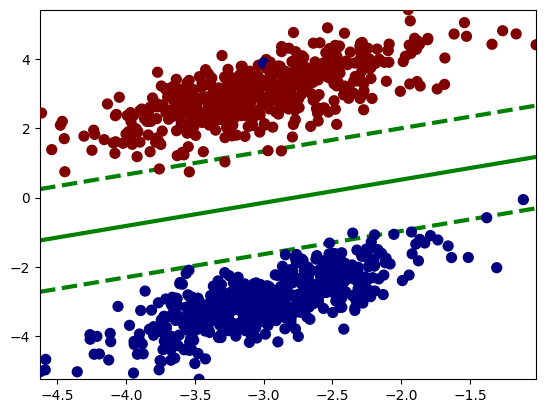

In [10]:
#Use this code for visualization for both models
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model1.decision_function(Xm) #change to model 2 as well.
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

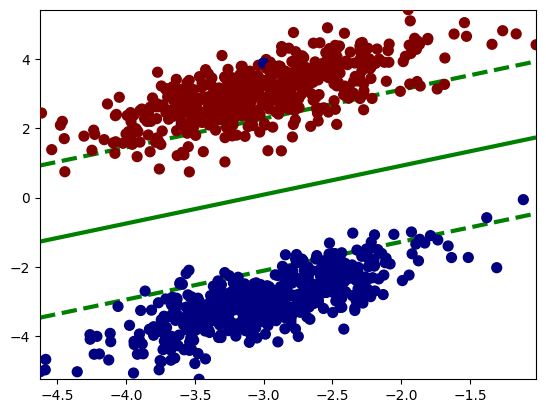

In [11]:
#Use this code for visualization for both models
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model2.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

`Answer 1:`

**Model 1** makes a smooth margin with good separation between classes.  
**Model 2** uses a stricter loss and higher penalty (`C`), which cause to a tighter fit but increases sensitivity to potential noise.


**Conclusion:**  
Model 1 is a better classifier in this case. It maintains a good margin, offering a better balance between bias and variance.


### `SVC`

<font color='#GG15D'>**Question2:** </font> <font color='#EE15D'>Create one model (model3) with SVC based on the following info and compare it with 2 previous models after visulizations:



*   **model3**: SVC, C=1.0, kernel=linear, probability=True



In [12]:
model3 = SVC(C=1.0, kernel='linear', probability=True)
model3.fit(X, y)

SVC(kernel='linear', probability=True)

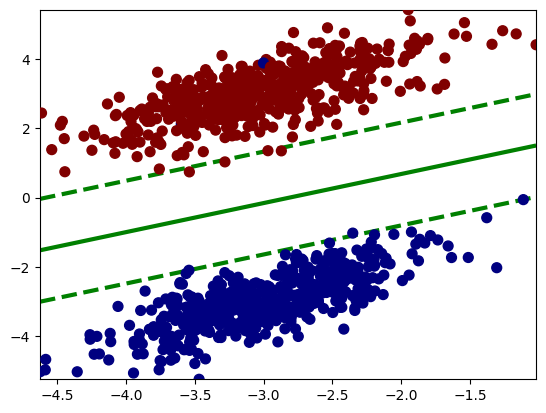

In [13]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model3.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)


`Answer 2:`

**Model 3** `SVC` provides a good balance between margin size and classification performance. It’s more stable and less overfitting, if it compared to the `LinearSVC` models.



<font color='#GG15D'>**Question3**:</font> Use <font color='#EE15D'> model3.support_</font> and <font color='#EE15D'>model3.n_support_</font> to determine the number of support vectors in each class. Then, use the code below to visualize the support vectors. How many support vectors are there in Class 1 and Class 2 (separately)?

In [14]:
model3.support_, model3.n_support_

(array([154, 225, 770, 808, 902, 115, 208, 819, 930], dtype=int32),
 array([5, 4], dtype=int32))

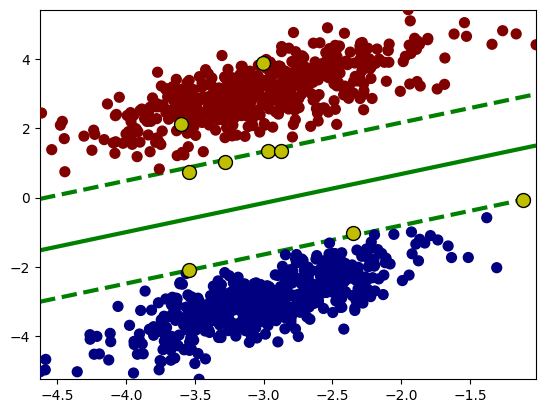

In [15]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model3.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)
sv = model3.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='y', s=100, edgecolors='k')

`Answer 3:`

- **Class 1:** 5 support vectors  
- **Class 2:** 4 support vectors  

These yellow points lie on or near the margin boundaries, which are the most important samples for defining the decision boundary.


### `NuSVC`

<font color='#GG15D'>**Question4**:</font> <font color='#EE15D'>Create one model (model4) with NuSVC based on the following hyperparameters and compare it with 3 previous models after visulizations:



*   **model4**: NuSVC, nu=0.95, kernel=linear, probability=True


In [16]:
model4 = NuSVC(nu=0.05, kernel='linear', probability=True)
model4.fit(X, y)

NuSVC(kernel='linear', nu=0.05, probability=True)

`Answer 4:`

**Model 4** uses more support vectors than **Model 3** because of the `nu=0.05` setting. Its boundary is still linear, but includes more close data points, which makes it more stable against small data changes.

Compared to **Model 1 and 2**, **Model 4** is similar to SVC, but it is more controlable over how many points influence the margin.

<font color='#GG15D'>**Question5**:</font> <font color='#EE15D'>Visualize model 4 with the following code and compare the number of support vector machines with model 3.

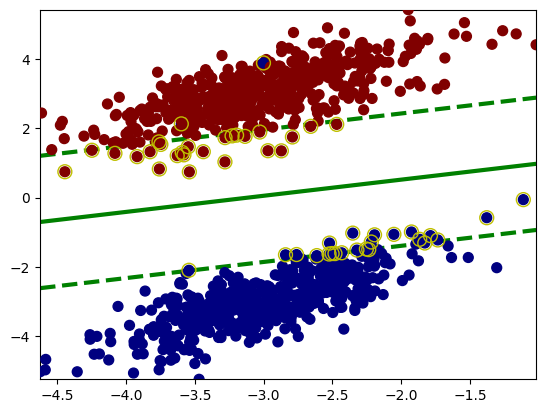

In [17]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model4.decision_function(Xm)
ym = ym.reshape(x1m.shape)

# plt.contourf(x1m, x2m, ym, levels=[-20, -1, 1, 20], cmap='plasma')
plt.contour(x1m, x2m, ym, levels=[-1, 0, 1], linestyles=['--', '-', '--'], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model4.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')

`Answer 5:`

**Model 4** uses more support vectors than **Model 3**, as shown by the large number of yellow points in the plot.

- **Model 3** focused on a minimal margin solution with few support vectors.
- **Model 4** allows a larger margin and selects more support vectors because of the `nu=0.05` parameter.

## **🔸 Kernel Trick (sklearn)**

<font color='#EE15D'>When the dataset is not linearly separable

In [18]:
from sklearn.svm import SVC

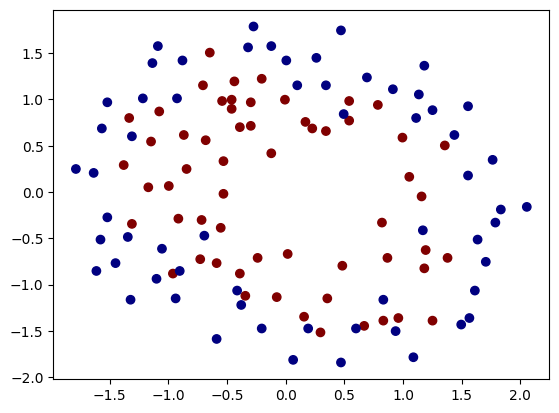

In [19]:
#Load the dataset
url_txt = "https://raw.githubusercontent.com/Azadshokrollahi/Artificial-intelligence-for-data-science-/main/Lab2-Data/ex2data2.txt"
data = np.loadtxt(url_txt, delimiter=',')

X = data[:, :-1].copy()
y = data[:, -1].copy().astype(np.int64)

normz = StandardScaler()
X = normz.fit_transform(X)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet');

<font color='#GG15D'>**Question6**: <font color='#EE15D'>Create 3 models (model5, model6, and model7) with the following hyperparameters:



*   **model5** : SVC, C=1.0, kernel=poly, degree=2, coef0=1
*   **model6** : SVC, C=1.0, kernel=rbf, degree=2, coef0=1
*   **model7** : SVC, C=1.0, kernel=sigmoid, degree=2, coef0=1

<font color='#EE15D'>Visualize the results of the 3 models and interpret them. Which model best fits the data?






In [21]:
model5 = SVC(C=1.0, kernel='poly', degree=2, coef0=1)
model5.fit(X, y)

SVC(coef0=1, degree=2, kernel='poly')

In [22]:
model6 = SVC(C=1.0, kernel='rbf', degree=2, coef0=1)
model6.fit(X, y)

SVC(coef0=1, degree=2)

In [23]:
model7 = SVC(C=1.0, kernel='sigmoid', degree=2, coef0=1)
model7.fit(X, y)

SVC(coef0=1, degree=2, kernel='sigmoid')

Text(0.5, 1.0, 'Model 5: Polynomial Kernel (degree=2)')

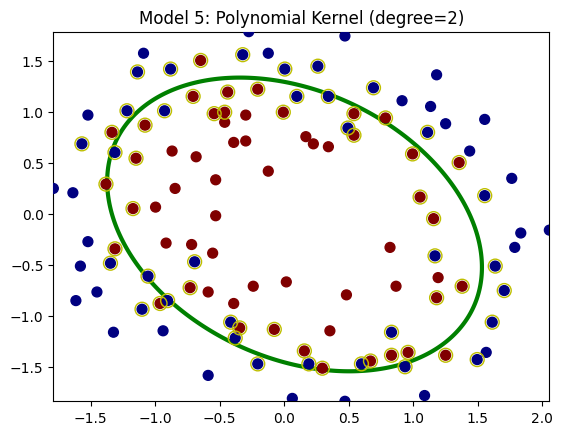

In [26]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model5.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model5.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')
plt.title("Model 5: Polynomial Kernel (degree=2)")

Text(0.5, 1.0, 'Model 6: RBF Kernel')

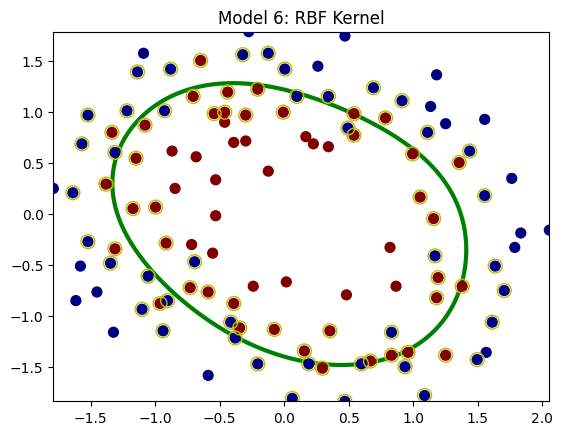

In [27]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model6.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model6.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')
plt.title("Model 6: RBF Kernel")

Text(0.5, 1.0, 'Model 7: Sigmoid Kernel')

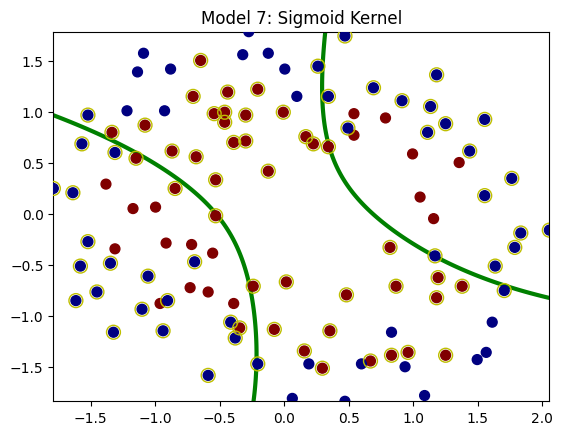

In [28]:
n = 1000
xmin, xmax = X.min(0), X.max(0)
x1r = np.linspace(xmin[0], xmax[0], n)
x2r = np.linspace(xmin[1], xmax[1], n)
x1m, x2m = np.meshgrid(x1r, x2r)

Xm = np.stack((x1m.flatten(), x2m.flatten()), axis=1)
ym = model7.decision_function(Xm)
ym = ym.reshape(x1m.shape)

plt.contour(x1m, x2m, ym, levels=[0], linewidths=3, colors='green')

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', s=50, zorder=3)

sv = model7.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], zorder=4, c='none', s=100, edgecolors='y')
plt.title("Model 7: Sigmoid Kernel")

`Answer 6:`

**Model 5 (Polynomial):**  
This model draws a round boundary that fits the data shape fine. The support vectors are placed evenly around the edge.

**Model 6 (RBF):**  
This model has the most flexible boundary that closely follows the shape of the data and makes the less mistakes.

**Model 7 (Sigmoid):**  
This model’s boundary are seperated curved lines. It does not follow the data shape and makes mistakes.

**Conclusion:**  
**Model 6** is the best one. It correctly works with the non-linear data and clearly separates the two classes.